In [ ]:
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/NUCHI201908DATA2/blob/master/Lessons/06-Python-APIs/2/Activities/05-Ins_OpenWeatherDataFrame/Solved/Ins_OpenWeatherDataFrame.ipynb


In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"
units ="metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=761baeeb2bf8ccaf0f4f10c5ec153aa8&units=metric&q=


In [10]:
print(weather_api_key)

761baeeb2bf8ccaf0f4f10c5ec153aa8


In [11]:
#Read in CSV file
df=pd.read_csv(output_data_file)
df.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [12]:
len(df)

548

### Generate Cities List


In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [14]:
cities


['timmins',
 'haapiti',
 'port elizabeth',
 'mahebourg',
 'asau',
 'leningradskiy',
 'ranot',
 'namibe',
 'cidreira',
 'tooele',
 'marienburg',
 'bouna',
 'khatanga',
 'ushuaia',
 'punta arenas',
 'kapaa',
 'boa esperanca',
 'torbay',
 'dongsheng',
 'cockburn town',
 'rikitea',
 'airai',
 'nikolskoye',
 'busselton',
 'taolanaro',
 'geraldton',
 'egvekinot',
 'zaragoza',
 'albany',
 'port alfred',
 'arraial do cabo',
 'qaanaaq',
 'lebu',
 'yellowknife',
 'atuona',
 'ribeira grande',
 'carutapera',
 'lompoc',
 'lorengau',
 'chokurdakh',
 'bluff',
 'gogrial',
 'beaverlodge',
 'barrow',
 'iracoubo',
 'vaini',
 'thompson',
 'cape town',
 'fukue',
 'tasiilaq',
 'mataura',
 'sorrento',
 'hilo',
 'hope mills',
 'changji',
 'saint-augustin',
 'illoqqortoormiut',
 'cabo san lucas',
 'sainte-marie',
 'concepcion del uruguay',
 'pevek',
 'upernavik',
 'necochea',
 'marcona',
 'puerto ayora',
 'bredasdorp',
 'dikson',
 'hamilton',
 'yenagoa',
 'bucerias',
 'balykshi',
 'lolua',
 'haines junction',


### Perform API Calls

   * Perform a weather check on each city using a series of successive API calls.
   * Include a print log of each city as it'sbeing processed (with the city number and city name).



In [15]:
# set up lists to hold reponse info as columns in the dataframe
city_list=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

record_counter=0
set_counter=1

# gather date to populate dataframe  #Procees / Print / Boundary Check / Exception Handling


print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
#Process    
    try:
        response=requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        city_list.append(city)
        record_counter +=1
#Print        
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}") 
    
#Boundary Check       
        if record_counter >= 50:
            record_counter=0
            set_counter +=1      
            
#Exception Handling 
    except Exception:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
              
    
#TA's I noticed in the Homework checksum for this assignment it appears there is an error in where the  
#print(f"Processing Record {record_counter} of Set {set_counter} | {city}") is placed in your presumably similar 
#example code that generaged the given printout for reference.  
#For Example: See first record of first Set is 1 of 50.  Subsequent sets are 0 of 49.  Is this what you wanted to see?
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | timmins
Processing Record 2 of Set 1 | haapiti
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | mahebourg
City not found. Skipping...
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | ranot
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | tooele
Processing Record 10 of Set 1 | marienburg
Processing Record 11 of Set 1 | bouna
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | boa esperanca
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | dongsheng
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | nikolskoye
Processing Reco

Processing Record 35 of Set 4 | longyearbyen
Processing Record 36 of Set 4 | nanortalik
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | halapitan
City not found. Skipping...
Processing Record 39 of Set 4 | butaritari
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | uige
Processing Record 41 of Set 4 | hay river
Processing Record 42 of Set 4 | punta alta
Processing Record 43 of Set 4 | hami
Processing Record 44 of Set 4 | baker city
Processing Record 45 of Set 4 | mayo
Processing Record 46 of Set 4 | seminole
Processing Record 47 of Set 4 | vardo
Processing Record 48 of Set 4 | faanui
City not found. Skipping...
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | raymond terrace
Processing Record 1 of Set 5 | belmonte
City not found. Skipping...
Processing Record 2 of Set 5 | capaci
Processing Record 3 of Set 5 | srandakan
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | maniitsoq
P

Processing Record 17 of Set 8 | altamira
Processing Record 18 of Set 8 | ballarat
Processing Record 19 of Set 8 | villaviciosa
Processing Record 20 of Set 8 | nara
Processing Record 21 of Set 8 | chilliwack
Processing Record 22 of Set 8 | diamantino
Processing Record 23 of Set 8 | qinhuangdao
City not found. Skipping...
Processing Record 24 of Set 8 | akdepe
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of Set 8 | kalispell
Processing Record 26 of Set 8 | guerrero negro
Processing Record 27 of Set 8 | margate
Processing Record 28 of Set 8 | guadalupe
Processing Record 29 of Set 8 | trud
Processing Record 30 of Set 8 | englewood
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 8 | longford
Processing Record 32 of Set 8 | port augusta
Processing Record 33 of Set 8 | hervey bay
Processing Record 34 of Set 8 | kirakira
Processing Record 35 of Set 8 | arkadelphia
Processing Record 36 of Set 8 | ari

## Convert Raw Data to DataFrame
   * Export the city data into a .csv
   * Display the DataFrame
    
    
    

In [16]:
# create a data frame from city, cloudiness, country, date, humidity, lat, lng, max temp, wind speed
# some code borrowed from #https://nu.bootcampcontent.com/NU-Coding-Bootcamp/NUCHI201908DATA2/blob/master/Lessons/
#06-Python-APIs/2/Activities/05-Ins_OpenWeatherDataFrame/Solved/Ins_OpenWeatherDataFrame.ipynb

weather_dict = {
    "City": city_list,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,timmins,90,CA,1570050434,86,48.48,-81.33,5.00,4.60
1,haapiti,20,PF,1570050215,65,-17.57,-149.87,27.00,2.10
2,port elizabeth,6,CD,1570050434,78,-7.04,29.76,19.47,1.21
3,mahebourg,75,MU,1570050134,88,-20.41,57.70,24.00,5.10
4,leningradskiy,100,RU,1570050435,94,69.38,178.42,-1.21,6.99


In [17]:
weather_data.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [18]:
#Save DataFrame to file (weather_data)
weather_data.to_csv('weather_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. 
* Save the plotted figures as .pngs.

 ## Latitude vs. Temperature Plot

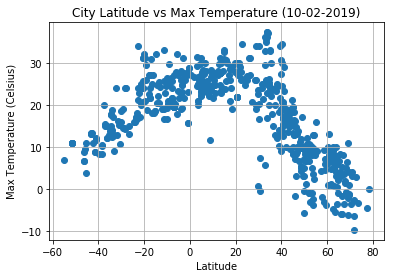

In [19]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Grab date of analysis Assistance from StackOverflow 
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

timestamp = weather_data['Date'].iloc[0]
ts=datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({ts})")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLat_vs_MaxTemp.png")

# Show plot
plt.show()

 ## Latitude vs. Humidity Plot


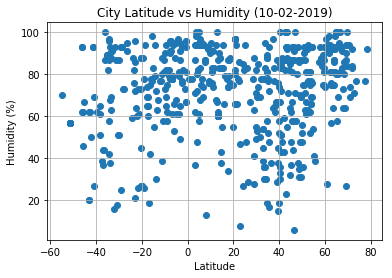

In [20]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Grab date of analysis Assistance from StackOverflow 
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

timestamp = weather_data['Date'].iloc[0]
ts=datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({ts})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLat_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

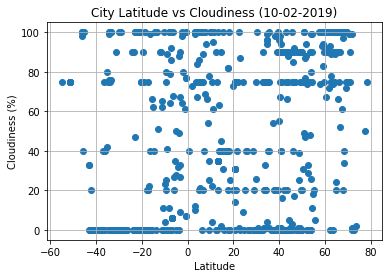

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Grab date of analysis Assistance from StackOverflow 
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

timestamp = weather_data['Date'].iloc[0]
ts=datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({ts})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLat_vs_Cloudiness.png")

# Show plot
plt.show()

 ## Latitude vs. Wind Speed Plot

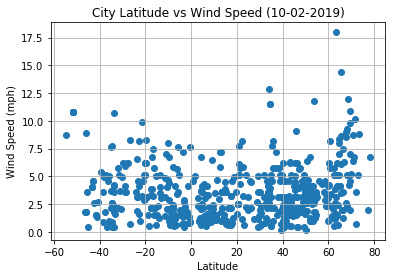

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Grab date of analysis Assistance from StackOverflow 
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

timestamp = weather_data['Date'].iloc[0]
ts=datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({ts})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLat_vs_WindSpeed.png")

# Show plot
plt.show()

In [23]:
#split cities according to norther or souther hemishere 
# Create Northern and Southern Hemisphere DataFrames
northern=weather_data[weather_data["Lat"]>0]
southern=weather_data[weather_data["Lat"]<0]

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8128631460281915


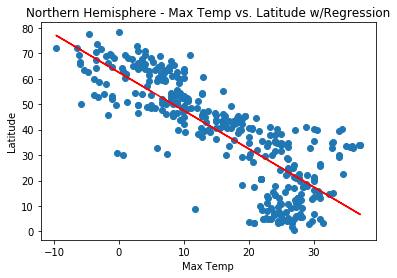

In [24]:
# Perform a linear regression on Max Temp vs Latitude
x_values=northern["Max Temp"]
y_values=northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title('Northern Hemisphere - Max Temp vs. Latitude w/Regression')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')


# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7365012990045418


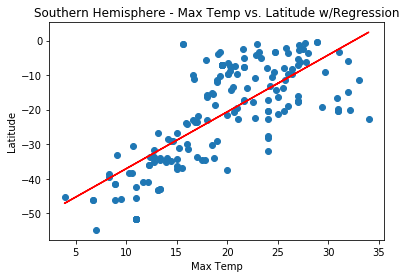

In [27]:
# Perform a linear regression on Max Temp vs Latitude
x_values=southern["Max Temp"]
y_values=southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title('Southern Hemisphere - Max Temp vs. Latitude w/Regression')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')


# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

 ## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06907016911243496


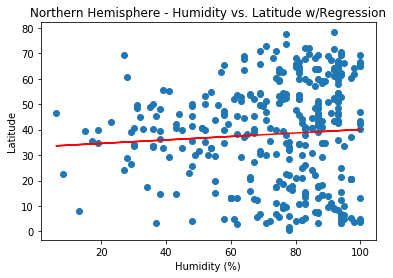

In [28]:
# Perform a linear regression on Humidity (%) vs. Latitude
x_values=northern["Humidity"]
y_values=northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title('Northern Hemisphere - Humidity vs. Latitude w/Regression')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')


# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

 ## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2579279284917367


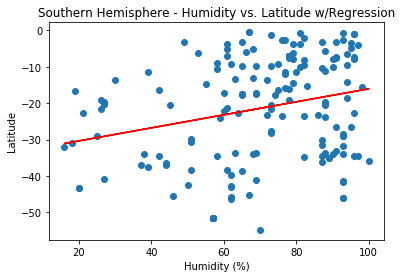

In [29]:
# Perform a linear regression on Humidity vs Latitude
x_values=southern["Humidity"]
y_values=southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere - Humidity vs. Latitude w/Regression')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')


# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11679589452620312


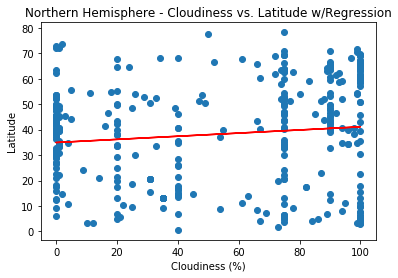

In [30]:
# Perform a linear regression on Cloudiness (%) vs. Latitude
x_values=northern["Cloudiness"]
y_values=northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere - Cloudiness vs. Latitude w/Regression')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')


# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.7365012990045418


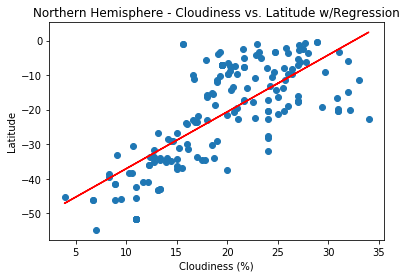

In [31]:
# Perform a linear regression Cloudiness (%) vs. Latitude
x_values=southern["Max Temp"]
y_values=southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere - Cloudiness vs. Latitude w/Regression')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')


# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

 ## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.8128631460281915


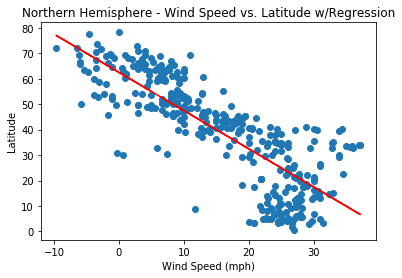

In [32]:
# Perform a linear regression on Wind Speed (mph) vs. Latitude
x_values=northern["Max Temp"]
y_values=northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere - Wind Speed vs. Latitude w/Regression')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')


# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

 ## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3589579915908776


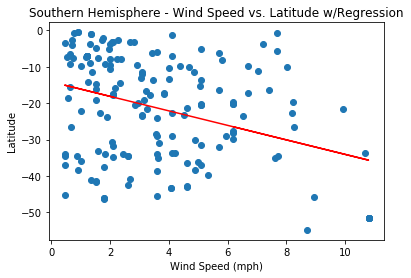

In [33]:
# Perform a linear regression on Max Temp vs Latitude
x_values=southern["Wind Speed"]
y_values=southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere - Wind Speed vs. Latitude w/Regression')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')


# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()